In [2]:
import sys
import os


# provide repo access to this notebook 
notebook_dir = os.path.abspath('')
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)
model_files_dir = os.path.join(project_root, 'process_bigraph', 'experiments', 'model_files')
minE_model_fp = os.path.join(model_files_dir, 'minE_model.txt')

In [3]:
# begin by creating a process instance. Note that the process object need not be imported, rather
    # specified under ['address'] in the outermost 'smoldyn' node

instance = {
    'smoldyn': {
        '_type': 'process',
        'address': 'local:smoldyn_process', 
        'config': {
            'model_filepath': 'process_bigraph/experiments/model_files/minE_model.txt',
            'animate': False,
        },
        'wires': {  # this should return that which is in the schema
            'species_counts': ['species_counts_store'],
            'molecules': ['molecules_store'],
        }
    },
    'emitter': {
        '_type': 'step',
        'address': 'local:ram-emitter',
        'config': {
            'ports': {
                'inputs': {
                    'species_counts': 'tree[any]',
                    'molecules': 'tree[any]'
                },
                'outputs': {
                    'species_counts': 'tree[any]',
                    'molecules': 'tree[any]'
                },
            }
        },
        'wires': {
            'inputs': {
                'species_counts': ['species_counts_store'],
                'molecules': ['molecules_store'],
            }
        }
    }
}

In [4]:
# import bigraph-viz functions 

from bigraph_viz import plot_bigraph, plot_flow, plot_multitimestep, pf
from bigraph_viz.dict_utils import replace_regex_recursive

plot_settings = {'remove_process_place_edges': True}
save_images = False
if save_images:
    plot_settings.update({'out_dir': 'out','dpi': '250'})

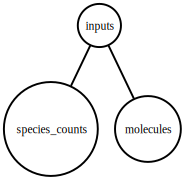

In [5]:
plot_bigraph(instance['emitter']['wires'], **plot_settings, show_types=True, filename='smoldyn_process')

In [6]:
plot_settings2={}
if save_images:
    plot_settings2.update({
        'out_dir': 'out',
        'dpi': '250'
    })

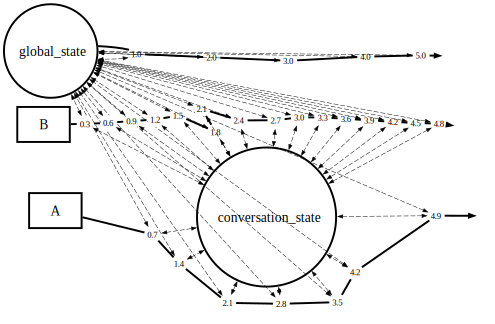

In [18]:
# assuming seconds, the following spec simulates a conversation between participants A and B over 5 seconds


multitimestep_spec = {
    'A': {
        '_ports': {'input': 'Any', 'output': 'Any'},
        'wires': {'input': 'global_state', 'output': 'conversation_state'},
        '_sync_step': 0.7,  # participant A contributes slower 
    },
    'B': {
       '_ports': {'input': 'Any', 'output': 'Any'},
        'wires': {'input': 'global_state', 'output': 'conversation_state'},
        '_sync_step': 0.3, # participant A contributes faster
    },
    'global_state': {
        '_ports': {'state': 'Any'},
        'wires': {'state': 'global_state'},
        '_sync_step': 1.0, # assume a normalized uniform time step
    }
}
multitimestep_spec = replace_regex_recursive(multitimestep_spec)
plot_multitimestep(multitimestep_spec, total_time=5.0, **plot_settings2, filename='multitimestep')


# the conversation state is influenced by both participants and the global state

